## Desafio Aprendizagem Não Supervisionada

### Desafio
- Link: https://github.com/datawaybr/CDKS-0003-FUNDAMENTOS-DE-MACHINE-LEARNING-NAO-SUPERVISIONADO-KICKSTART (referência: https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species)
  
- Descrição: Conjunto de dados que descrevem características de uma amostra de pinguins de diversas espécies. O conjunto de dados é composto por 5 colunas:
  * culmen_length_mm: comprimento do culmen (mm)
  * culmen_depth_mm: profundidade do culmen (mm)
  * flipper_length_mm: comprimento da nadadeira (mm)
  * body_mass_g: massa corporal (g)
  * sex: sexo do pinguim
    


- Problema de Negócio: Precisamos identificar grupos de pinguins semelhantes a fim de identificar mais rapidamente espécies distintas.
  
- Desafio: Monte um modelo de aprendizado não supervisionado para lidar com esse desafio

- Sugestão extra: Publique esse desafio no seu Git Hub e vincule ao seu Linkedin.

## Importando Pacotes


In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
penguins_df = pd.read_csv("../../bases/penguins/penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


## Lidando com valores nulos e outliers


In [3]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


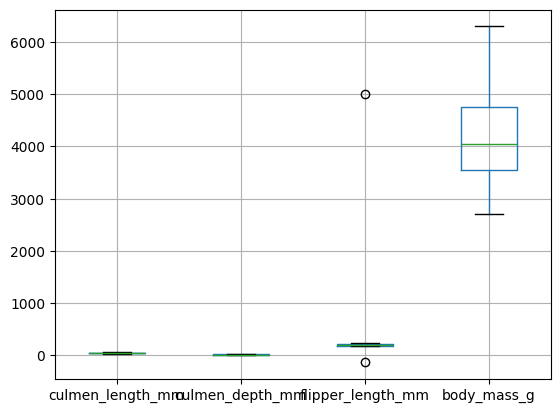

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [4]:
penguins_df.boxplot()
plt.show()

penguins_df = penguins_df.dropna()
penguins_df[penguins_df["flipper_length_mm"] > 4000]
penguins_df[penguins_df["flipper_length_mm"] < 0]

penguins_clean = penguins_df.drop([9, 14])
penguins_clean.head()

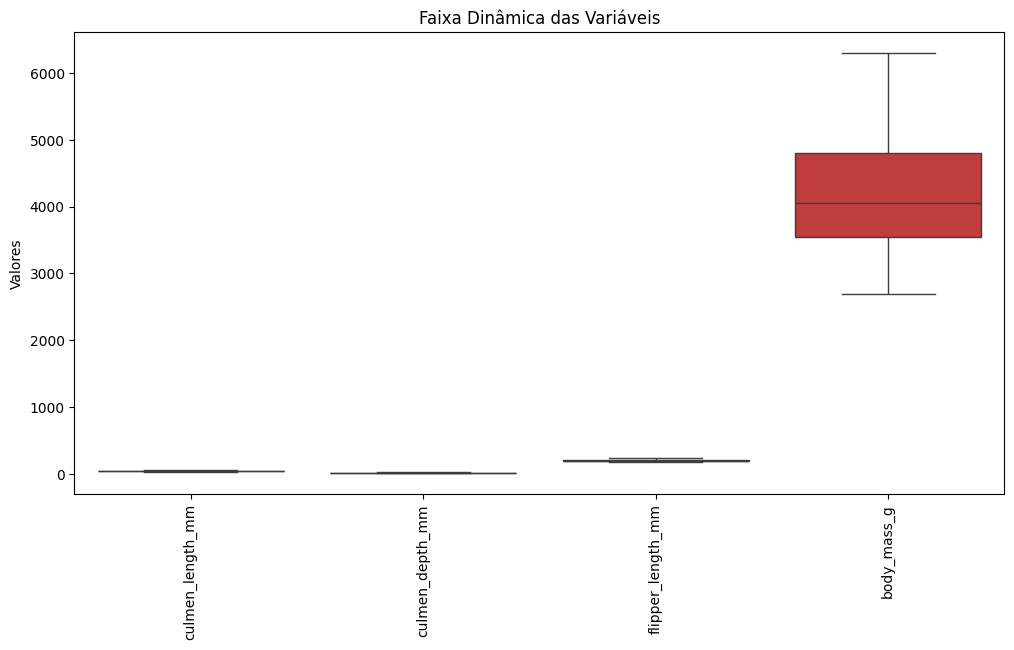

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=penguins_clean)
plt.ylabel("Valores")
plt.title('Faixa Dinâmica das Variáveis')
plt.xticks(rotation=90)
plt.show()

## Préprocessamento


In [6]:
df = pd.get_dummies(penguins_clean).drop("sex_.", axis=1)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


## Ajustando as escalas - scaling


In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


## PCA


In [8]:
penguins_preprocessed.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_FEMALE', 'sex_MALE'],
      dtype='object')

In [9]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
print(dfx_pca.explained_variance_ratio_)
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.08)

pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
print(n_components)

[0.51973484 0.34424041 0.08591863 0.03225427 0.01686049 0.00099136]
3


## Identificando o melhor K para esses dados


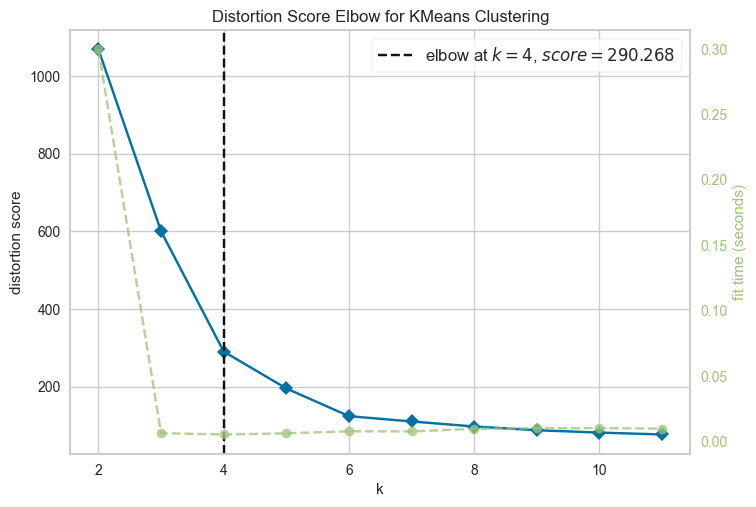

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings 
warnings.filterwarnings('ignore')

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(penguins_PCA)        
visualizer.show()

In [11]:
n_clusters = 4

## Treinando modelo


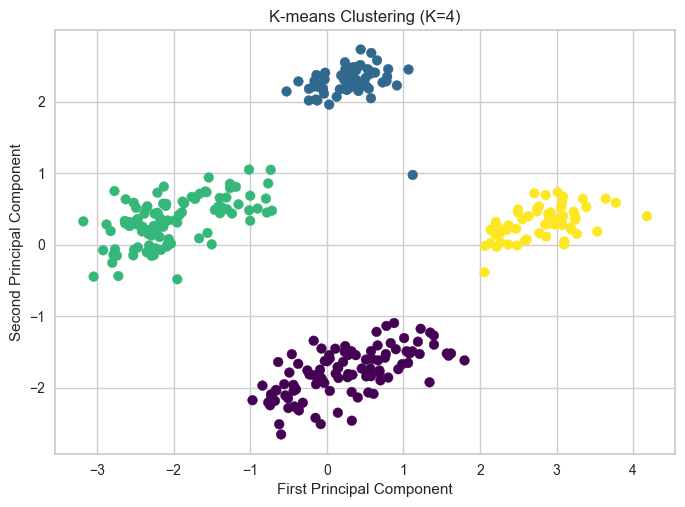

In [12]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()

---
## Avaliando

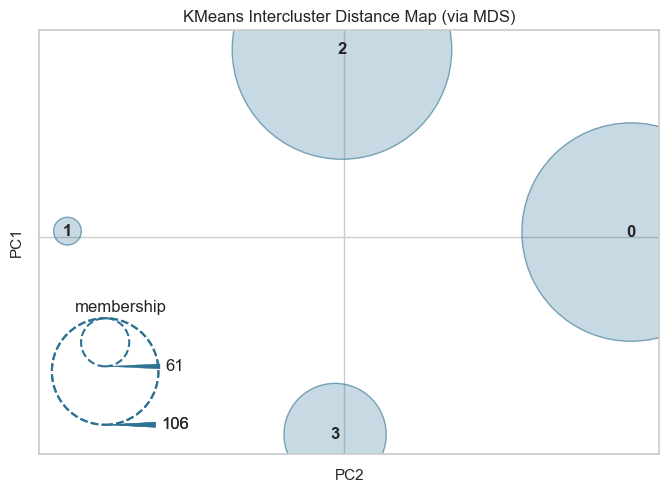

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [13]:
from yellowbrick.cluster import InterclusterDistance

visualizer = InterclusterDistance(kmeans)

visualizer.fit(penguins_PCA)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

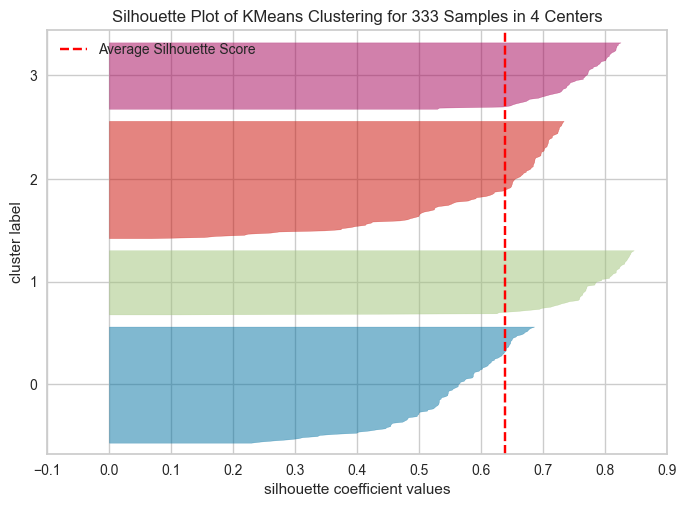

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 333 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(penguins_PCA) 
visualizer.show()  


----